<a href="https://colab.research.google.com/github/sllpwlkr/Frameworks_7sem_Lupanova/blob/main/PSFII_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1: KNN

## Задача классификации

### 1.	Выбор начальных условий




a. Выбор набора данных


Набор данных: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality
(определение качества яблок)

Практическая значимость: Качество сельскохозяйственной продукции напрямую влияет на экономику и здоровье потребителей. Определение качества яблок по их характеристикам (размер, сладость, хрусткость и т.д.) - актуальная задача в агропромышленном секторе.

b. Выбор метрик качества для определения качества яблок

- Accuracy -  дает общее представление о том, насколько хорошо модель справляется с задачей классификации в целом.

- Precision - если модель ошибочно классифицирует плохое яблоко как хорошее (false positive), это может привести к серьезным последствиям - бракованная продукция попадет к потребителю.

- Recall - если модель пропускает много хороших яблок (false negative), это приводит к неоправданным потерям для производителя, так как качественная продукция может быть отбракована.

- F1-score - помогает найти баланс между Precision и Recall.

- Confusion Matrix - позволит наглядно увидеть, какие именно ошибки совершает модель.

### 2. Создание бейзлайна и оценка качества

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Загрузка данных
df = pd.read_csv('apple_quality.csv')

#Предобработка данных
print(df.head(1))
print(df.describe())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336    5.34633    -1.012009     1.8449   0.32984   

        Acidity Quality  
0  -0.491590483    good  
              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  4000.000000  4000.000000  
mean      0.512118     0.498277  
std       1.930286     1.8

In [ ]:
#Проверяем общее количество пропусков
total_missing = df.isnull().sum().sum()
print(f"Всего пропущенных значенийй: {total_missing}")

#Удаление строк с пропущенными значениями
initial_rows = len(df)
df_clean = df.dropna()
rows_after_cleaning = len(df_clean)
rows_removed = initial_rows - rows_after_cleaning

print(f"\nКоличество строк до удаления пропусков: {initial_rows}")
print(f"Удалено строк с пропущенными значениями: {rows_removed}")

#Сохраняем очищенный df
df = df_clean.copy()

Всего пропущенных значенийй: 8

Количество строк до удаления пропусков: 4001
Удалено строк с пропущенными значениями: 1


In [ ]:
#Проверим баланс классов
print(df['Quality'].value_counts())

Quality
good    2004
bad     1996
Name: count, dtype: int64


In [ ]:
#Преобразуем целевую переменную из категориального в чиловой признак
le = LabelEncoder()
df['Quality_encoded'] = le.fit_transform(df['Quality'])
print(f"\nКодирование классов: {dict(zip(le.classes_, le.transform(le.classes_)))}")


Кодирование классов: {'bad': np.int64(0), 'good': np.int64(1)}


In [ ]:
#Удаляем колонку с id и разделяем датасет на фичи и целевую переменную
X = df.drop(['A_id', 'Quality', 'Quality_encoded'], axis=1)
y = df['Quality_encoded']

In [ ]:
#Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#Бейзлайн модель и предсказания
knn_baseline = KNeighborsClassifier()
knn_baseline.fit(X_train, y_train)

y_pred_baseline = knn_baseline.predict(X_test)


KNN Baseline Результаты:
Accuracy: 0.8942
Precision: 0.8943
Recall: 0.8942
F1-score: 0.8942


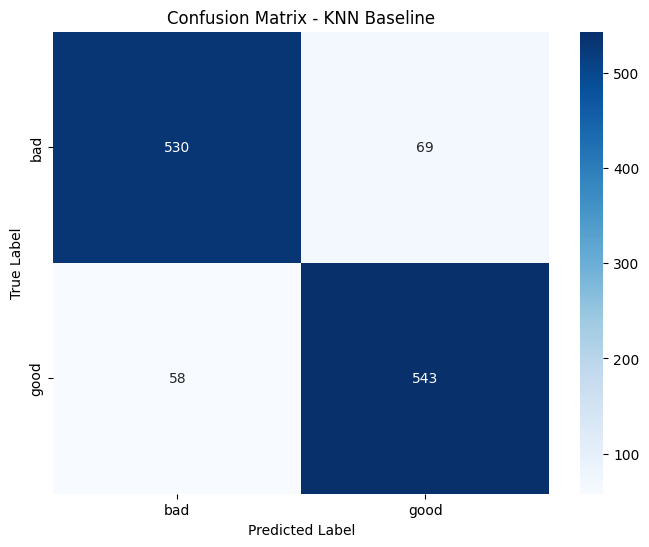

In [ ]:
#Оценка качества
def evaluate_model(y_true, y_pred, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name} Результаты:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Матрица ошибок
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

baseline_results = evaluate_model(y_test, y_pred_baseline, "KNN Baseline")

### 3. Улучшение бейзлайна

Гипотеза 1: подбор оптимального k (количетсва соседей)

Гипотеза 2: масштабирование данных

Гипотеза 3: подбор метрики расстояния и весов

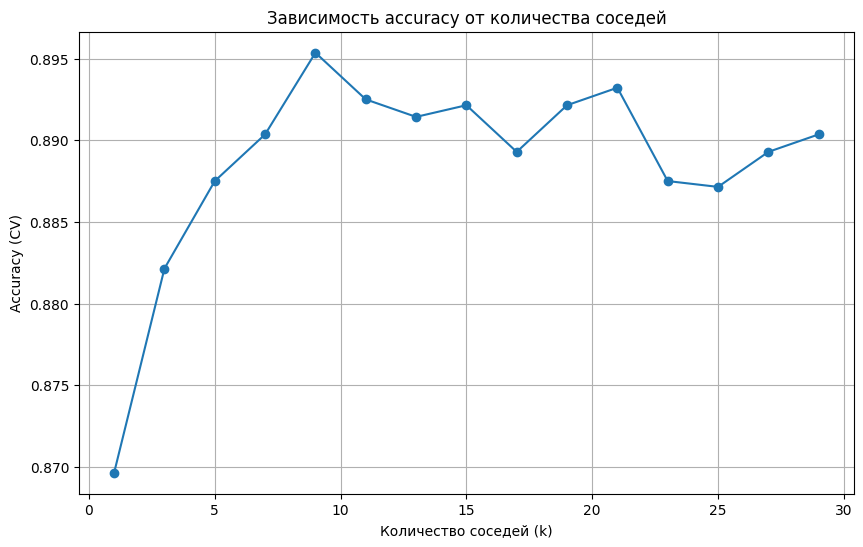

Лучшее значение k: 9


In [ ]:
#Подбор оптимального k
k_values = list(range(1, 31, 2))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Accuracy (CV)')
plt.title('Зависимость accuracy от количества соседей')
plt.grid(True)
plt.show()

# Лучшее значение k
best_k = k_values[np.argmax(cv_scores)]
print(f"Лучшее значение k: {best_k}")

In [ ]:
#Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Подбор метрики расстояния
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая accuracy на кросс-валидации: {grid_search.best_score_:.4f}")

Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Лучшая accuracy на кросс-валидации: 0.8989



KNN Improved Результаты:
Accuracy: 0.8975
Precision: 0.8977
Recall: 0.8975
F1-score: 0.8975


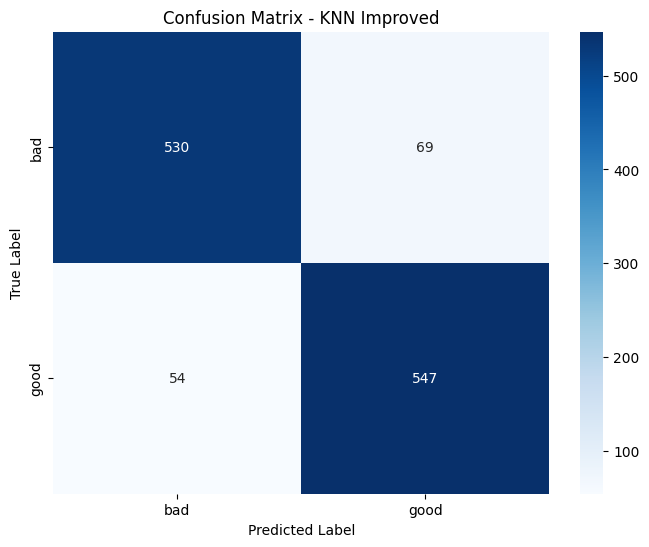

In [ ]:
#Обучение на улучшенных данных
knn_improved = KNeighborsClassifier(
    n_neighbors= 9,
    metric='euclidean',
    weights='distance'
)

knn_baseline.fit(X_train_scaled, y_train)
y_pred_improved = knn_baseline.predict(X_test_scaled)

improved_results = evaluate_model(y_test, y_pred_improved, "KNN Improved")

In [ ]:
#Сравнение всех моделей
results_df = pd.DataFrame({
    'Model': ['Baseline', 'Improved Model'],
    'Accuracy': [
        baseline_results['accuracy'],
        improved_results['accuracy']
    ],
    'Precision': [
        baseline_results['precision'],
        improved_results['precision']
    ],
    'Recall': [
        baseline_results['recall'],
        improved_results['recall']
    ],
    'F1-score': [
        baseline_results['f1'],
        improved_results['f1']
    ]
})

print(results_df.to_string(index=False))

         Model  Accuracy  Precision   Recall  F1-score
      Baseline  0.894167   0.894296 0.894167  0.894156
Improved Model  0.897500   0.897744 0.897500  0.897482


In [ ]:
#Анализ улучшений
baseline_acc = baseline_results['accuracy']
improved_acc = improved_results['accuracy']
improvement = ((improved_acc - baseline_acc) / baseline_acc) * 100

print(f"Бейзлайн accuracy: {baseline_acc:.4f}")
print(f"Улучшенная модель accuracy: {improved_acc:.4f}")
print(f"Улучшение: {improvement:.2f}%")

Бейзлайн accuracy: 0.8942
Улучшенная модель accuracy: 0.8975
Улучшение: 0.37%


Улучшение модели было минимальным. Исходные данные уже хорошо сбалансированы, параметры были близки к оптимальным.

### 4.	Имплементация алгоритма машинного обучения

In [ ]:
class CustomKNN:
    def __init__(self, n_neighbors=5, metric='euclidean', weights='uniform'):

        self.n_neighbors = n_neighbors
        self.metric = metric
        self.weights = weights
        self.X_train = None
        self.y_train = None

    #Вычисление расстояния между двумя точками
    def _calculate_distance(self, x1, x2):

        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        elif self.metric == 'chebyshev':
            return np.max(np.abs(x1 - x2))
        else:
            #По умолчанию евклидово
            return np.sqrt(np.sum((x1 - x2) ** 2))

    def fit(self, X, y):
        #Преобразуем y в numpy array и сбрасываем индексы
        self.X_train = X
        self.y_train = np.array(y).flatten() if len(y.shape) > 1 else np.array(y)
        return self

    def predict(self, X):
        predictions = []

        for x in X:
            #Вычисляем расстояния до всех тренировочных точек
            distances = []
            for i, train_point in enumerate(self.X_train):
                dist = self._calculate_distance(x, train_point)
                distances.append((dist, i))

            #Сортируем по расстоянию и берем k ближайших
            distances.sort(key=lambda x: x[0])
            k_nearest = distances[:self.n_neighbors]

            #Получаем индексы и метки ближайших соседей
            k_indices = [idx for _, idx in k_nearest]
            k_labels = self.y_train[k_indices]

            #Учитываем веса
            if self.weights == 'uniform':
                #Простое большинство
                unique, counts = np.unique(k_labels, return_counts=True)
                prediction = unique[np.argmax(counts)]
            elif self.weights == 'distance':
                #Обратно пропорционально расстоянию
                weights = 1.0 / (np.array([dist for dist, _ in k_nearest]) + 1e-10)
                weighted_votes = {}

                for idx, label in enumerate(k_labels):
                    if label not in weighted_votes:
                        weighted_votes[label] = 0
                    weighted_votes[label] += weights[idx]

                prediction = max(weighted_votes, key=weighted_votes.get)
            else:
                #По умолчанию uniform
                unique, counts = np.unique(k_labels, return_counts=True)
                prediction = unique[np.argmax(counts)]

            predictions.append(prediction)

        return np.array(predictions)


In [ ]:
#Удаление индексов
X_train_custom = X_train_scaled
y_train_custom = pd.Series(y_train.values)
X_test_custom = X_test_scaled
y_test_custom = pd.Series(y_test.values)

In [ ]:
#Инициализация модели c baseline
custom_knn = CustomKNN(
    n_neighbors= 9,
    metric='euclidean',
    weights='distance'
)

custom_knn.fit(X_train_custom, y_train_custom)
y_pred_custom = custom_knn.predict(X_test_scaled)


Custom KNN Результаты:
Accuracy: 0.8892
Precision: 0.8895
Recall: 0.8892
F1-score: 0.8891


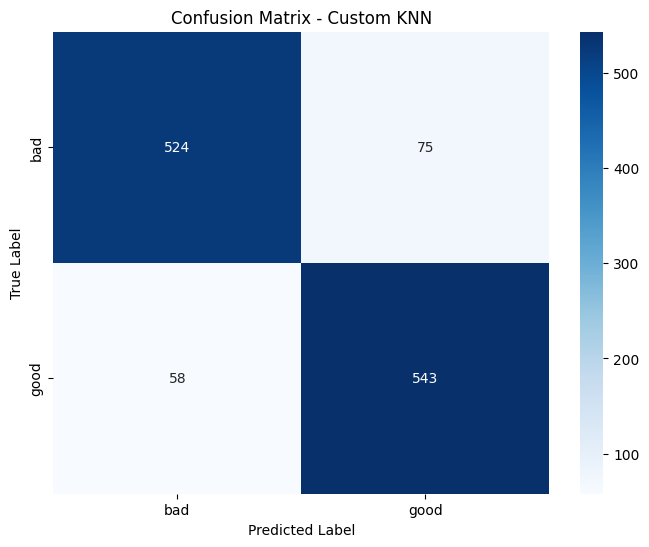

In [ ]:
#Оценка
custom_results = evaluate_model(y_test, y_pred_custom, "Custom KNN")

In [ ]:
#Сравнение всех моделей
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Baseline KNN': [
        baseline_results['accuracy'],
        baseline_results['precision'],
        baseline_results['recall'],
        baseline_results['f1']
    ],
    'Improved KNN': [
        improved_results['accuracy'],
        improved_results['precision'],
        improved_results['recall'],
        improved_results['f1']
    ],
    'Custom KNN': [
        custom_results['accuracy'],
        custom_results['precision'],
        custom_results['recall'],
        custom_results['f1']
    ]
})

print("Сравнение всех моделей:")
print(comparison_df.to_string(index=False))


Сравнение всех моделей:
   Metric  Baseline KNN  Improved KNN  Custom KNN
 Accuracy      0.894167      0.897500    0.889167
Precision      0.894296      0.897744    0.889474
   Recall      0.894167      0.897500    0.889167
 F1-score      0.894156      0.897482    0.889142


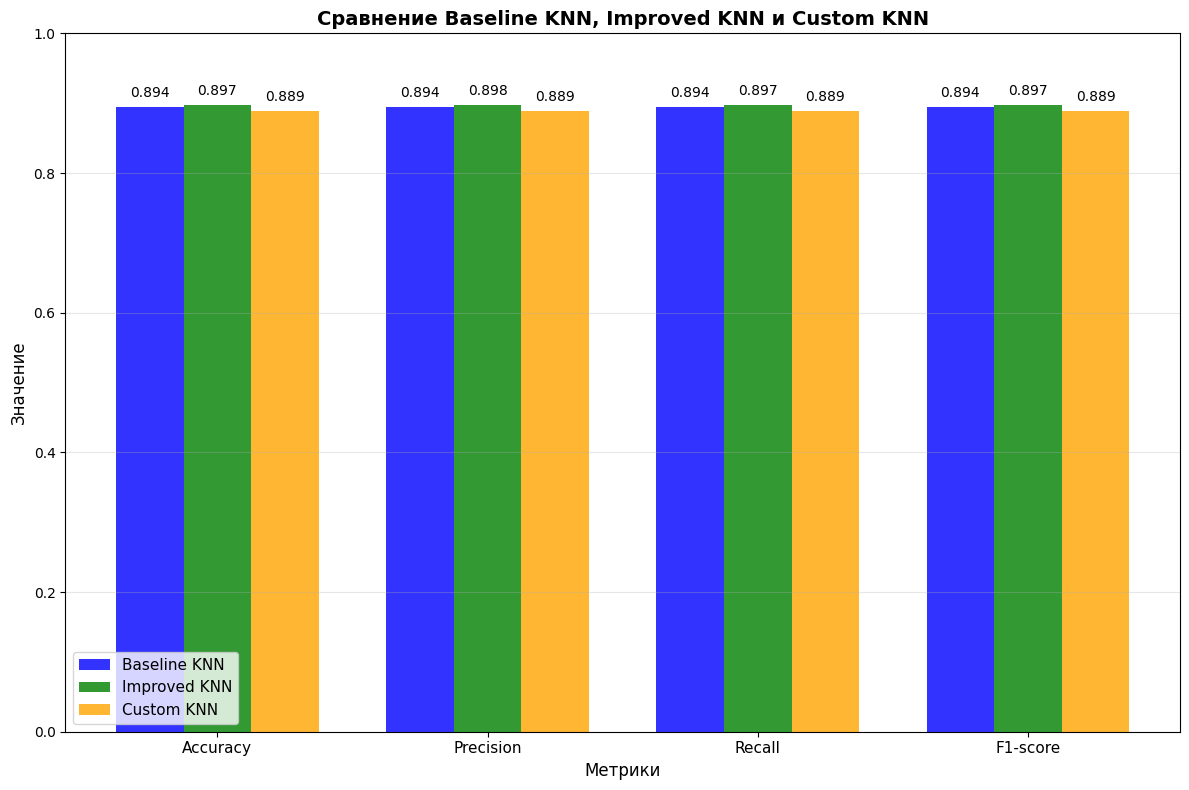

In [ ]:
#Визуализация сравнения
plt.figure(figsize=(12, 8))
x = np.arange(len(comparison_df))
width = 0.25

plt.bar(x - width, comparison_df['Baseline KNN'], width, label='Baseline KNN', alpha=0.8, color='blue')
plt.bar(x, comparison_df['Improved KNN'], width, label='Improved KNN', alpha=0.8, color='green')
plt.bar(x + width, comparison_df['Custom KNN'], width, label='Custom KNN', alpha=0.8, color='orange')

plt.xlabel('Метрики', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.title('Сравнение Baseline KNN, Improved KNN и Custom KNN', fontsize=14, fontweight='bold')
plt.xticks(x, comparison_df['Metric'], fontsize=11)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

for i in range(len(comparison_df)):
    plt.text(i - width, comparison_df['Baseline KNN'][i] + 0.01,
             f'{comparison_df["Baseline KNN"][i]:.3f}',
             ha='center', va='bottom', fontsize=10)
    plt.text(i, comparison_df['Improved KNN'][i] + 0.01,
             f'{comparison_df["Improved KNN"][i]:.3f}',
             ha='center', va='bottom', fontsize=10)
    plt.text(i + width, comparison_df['Custom KNN'][i] + 0.01,
             f'{comparison_df["Custom KNN"][i]:.3f}',
             ha='center', va='bottom', fontsize=10)

max_val = max(comparison_df[['Baseline KNN', 'Improved KNN', 'Custom KNN']].max().max() + 0.1, 1.0)
plt.ylim(0, max_val)
plt.tight_layout()
plt.show()

Все три модели показали близкие результаты по всем метрикам, причем Improved KNN демонстрирует наилучшую точность (89.8%), однако все модели находятся в диапазоне 89-90%, что свидетельствует о хорошей стабильности классификации качества яблок вне зависимости от выбранного подхода.

## Задача регрессии

### 1. Выбор начальных условий


Набор данных: https://www.kaggle.com/datasets/ulrikthygepedersen/pizza-place-sales (прогнозирование цены пиццы)

Исходный датасет содержит минимум признаков (всего 3) необходимых для обучения регрессии. Модели постоянно переобучались.
Мы добавили признаки, которые могут быть важны для предсказания цены пиццы, такие как: вес (weight_g), диаметр (diameter_cm), количество ингредиентов (ingredient_count), сложность (complexity_score), время приготовления (cook_time_min), стоимость ингредиентов (ingredient_cost), популярность (popularity_score), острота (spiciness), процент сыра (cheese_percent), тип теста (crust_type), тип соуса (sauce_type), плотность начинки (filling_density), площадь (area_cm2), плотность (density_g_per_cm2), общие калории (total_calories), эффективность приготовления (cook_efficiency), интенсивность ингредиентов (ingredient_intensity). Добавление признаков осуществлялось на основании имеющихся признаков (цена, название, размер, тип) с добавлением шума. Некоторые добавленные признаки коррелируют друг с другом.

Практическая значимость: прогнозирование цены пиццы на основе её характеристик для оптимизации ценообразования в ресторане/пиццерии

Выбор метрик качества для предсказания цены пиццы

- MAE - для понимания средней абсолютной ошибки в долларах
- RMSE - для учета влияния крупных ошибок
- $R^2$  Score - для относительной оценки качества модели

### 2.	Создание бейзлайна и оценка качества

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('pizza_dataset.csv')
df.head(5)

,id,date,time,name,size,type,price,diameter_cm,weight_g,calories_per_100g,...,cheese_percent,crust_type,sauce_type,filling_density,area_cm2,density_g_per_cm2,total_calories,cook_efficiency,ingredient_intensity,price_final
0,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25,29.498160,457.825488,279.125963,...,30.701562,regular,tomato,regular,683.061055,0.670256,1277.909802,0.309009,13.105430,50.00
1,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00,31.802857,481.340835,250.388400,...,16.691659,regular,tomato,regular,793.966056,0.606249,1205.221616,0.324397,6.232590,43.25
2,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00,30.927976,439.468001,222.409110,...,20.847359,regular,bbq,medium,750.883653,0.585268,977.416871,0.353923,11.377393,48.75
3,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75,36.394634,559.697009,248.607456,...,23.454774,regular,spicy_asian,regular,1039.786963,0.538280,1391.448496,0.384982,8.933405,59.50
4,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50,34.624075,568.288698,219.772790,...,39.873953,regular,tomato,medium,941.078833,0.603869,1248.943927,0.205297,10.558014,54.25


In [ ]:
df.describe()

,price,diameter_cm,weight_g,calories_per_100g,ingredient_count,complexity_score,cook_time_min,ingredient_cost,popularity_score,spiciness,cheese_percent,area_cm2,density_g_per_cm2,total_calories,cook_efficiency,ingredient_intensity,price_final
count,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000
mean,16.497762,30.690807,519.536413,280.118177,4.589321,4.715436,14.003510,10.670071,7.557020,1.641062,25.094816,760.464989,0.726839,1466.373133,0.337399,9.308713,49.368757
std,3.621954,5.178817,105.254349,41.468638,1.261791,1.584733,2.674232,2.130618,1.143916,0.848082,6.607897,248.667386,0.168644,411.329991,0.099527,3.600500,6.464381
min,9.750000,22.000067,221.577230,167.018611,3.000000,2.000000,4.661094,3.571696,3.215589,1.000000,15.000000,379.942312,0.348741,438.197968,0.108497,3.599621,28.250000
25%,12.750000,25.457615,441.250844,250.983063,4.000000,4.000000,12.131075,9.164775,6.747760,1.000000,19.920477,508.750760,0.602715,1168.892845,0.265424,6.697684,44.750000
50%,16.500000,30.647272,518.115671,280.101598,5.000000,5.000000,14.068492,10.624668,7.496350,1.000000,24.703116,737.315394,0.695078,1432.259760,0.334680,8.557001,49.250000
75%,20.250000,35.503520,595.925838,310.706355,5.000000,6.000000,15.893498,12.129966,8.320789,2.000000,29.665115,989.492420,0.829394,1725.405439,0.404105,11.190773,54.000000
max,35.950000,49.982993,853.363727,425.023101,8.000000,8.000000,24.361009,19.520416,10.000000,4.000000,50.000000,1961.165170,1.393794,3364.563092,0.869375,32.349101,72.750000


In [ ]:
#Идентификация категориальных признаков
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Категориальные признаки: {categorical_cols}")

#Изучим уникальные значения в каждом категориальном признаке
for col in categorical_cols:
    unique_vals = df[col].nunique()
    print(f"\n{col}:")
    print(f"  Уникальных значений: {unique_vals}")

Категориальные признаки: ['id', 'date', 'time', 'name', 'size', 'type', 'crust_type', 'sauce_type', 'filling_density']

id:
  Уникальных значений: 21350

date:
  Уникальных значений: 358

time:
  Уникальных значений: 16382

name:
  Уникальных значений: 32

size:
  Уникальных значений: 5

type:
  Уникальных значений: 4

crust_type:
  Уникальных значений: 5

sauce_type:
  Уникальных значений: 6

filling_density:
  Уникальных значений: 3


In [ ]:
#Обработка категориальных признаков
df_processed = df.copy()

#Удаляем исходные столбцы date, time и id
df_processed = df_processed.drop(['date', 'time', 'id'], axis=1)

#One-Hot для основных категориальных признаков
categorical_to_encode = ['size', 'type', 'crust_type', 'sauce_type', 'filling_density']

#Для name используем частотное кодирование, так как много уникальных значений
name_freq = df_processed['name'].value_counts(normalize=True)
df_processed['name_freq'] = df_processed['name'].map(name_freq)
df_processed = df_processed.drop('name', axis=1)

#One-Hot для остальных категориальных признаков
df_processed = pd.get_dummies(df_processed, columns=categorical_to_encode, drop_first=True)

print(f"Количество признаков после One-Hot Encoding: {df_processed.shape[1]}")

Количество признаков после One-Hot Encoding: 36


In [ ]:
#Обработка пропусков
missing_values = df_processed.isnull().sum()

if missing_values.sum() == 0:
    print("Пропусков в данных нет")
else:
    #Заполняем пропуски медианой для числовых и модой для категориальных
    for col in df_processed.columns:
        if df_processed[col].isnull().sum() > 0:
            if df_processed[col].dtype in ['int64', 'float64']:
                df_processed[col].fillna(df_processed[col].median(), inplace=True)
            else:
                df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
    print("Пропуски обработаны")

Пропусков в данных нет


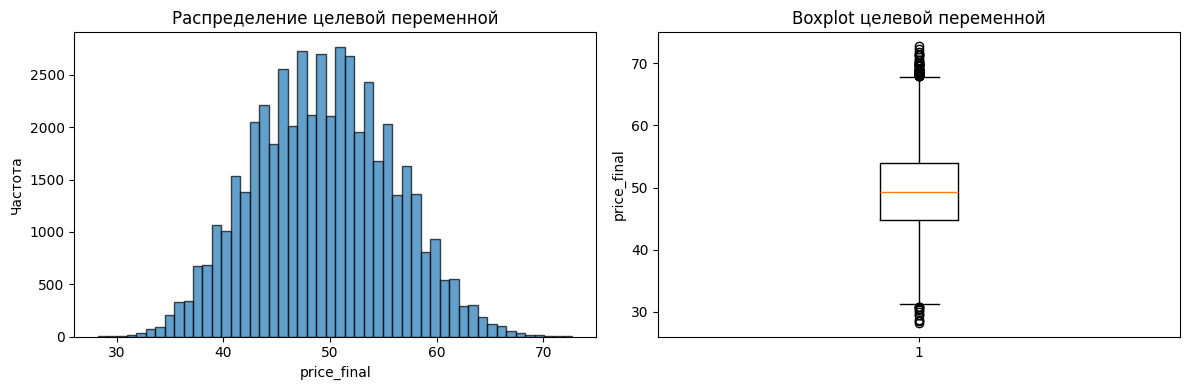

In [ ]:
#Разделение на признаки и целевую переменную
X = df_processed.drop('price_final', axis=1)
y = df_processed['price_final']

#Анализ целевой переменной
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(y, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('price_final')
plt.ylabel('Частота')
plt.title('Распределение целевой переменной')

plt.subplot(1, 2, 2)
plt.boxplot(y)
plt.ylabel('price_final')
plt.title('Boxplot целевой переменной')
plt.tight_layout()
plt.show()


In [ ]:
#Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [ ]:
#Обучение бейзлайла
knn_baseline = KNeighborsRegressor(n_neighbors=5, weights='uniform', p=2)
knn_baseline.fit(X_train, y_train)
y_pred_baseline = knn_baseline.predict(X_test)


baseline_metrics = {
    'MAE': mean_absolute_error(y_test, y_pred_baseline),
    'MSE': mean_squared_error(y_test, y_pred_baseline),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_baseline)),
    'R2': r2_score(y_test, y_pred_baseline)
}

print("\nМетрики бейзлайна:")
for metric, value in baseline_metrics.items():
    print(f"  {metric}: {value:.4f}")


Метрики бейзлайна:
  MAE: 2.7879
  MSE: 12.2160
  RMSE: 3.4951
  R2: 0.7101


Сравнивая MAE (2.79) и RMSE (3.50), можно сделать вывод, что модель совершает как небольшие ошибки, так и умеренно крупные, но без катастрофических выбросов.

### 3.	Улучшение бейзлайна



Гипотезы для улучшения:

1. Разные методы масштабирования улучшат качество KNN
2. Подбор оптимального k
3. Подбор весов
4. Подбор метрик расстояния
5. Отбор наиболее значимых признаков

In [ ]:
#Разные методы масштабирования
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

scaler_results = {}
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', p=2)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    scaler_results[scaler_name] = r2
    print(f"{scaler_name}: R² = {r2:.4f}")

best_scaler = max(scaler_results, key=scaler_results.get)
print(f"\nЛучший scaler: {best_scaler} с R² = {scaler_results[best_scaler]:.4f}")

StandardScaler: R² = 0.8775
MinMaxScaler: R² = 0.8635

Лучший scaler: StandardScaler с R² = 0.8775


In [ ]:
#Подбор оптимального k
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = range(1, 21, 2)
k_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, weights='uniform', p=2)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='r2')
    k_scores.append(scores.mean())

optimal_k = k_values[np.argmax(k_scores)]
print(f"Оптимальное k: {optimal_k} с R²: {max(k_scores):.4f}")



Оптимальное k: 13 с R²: 0.8758


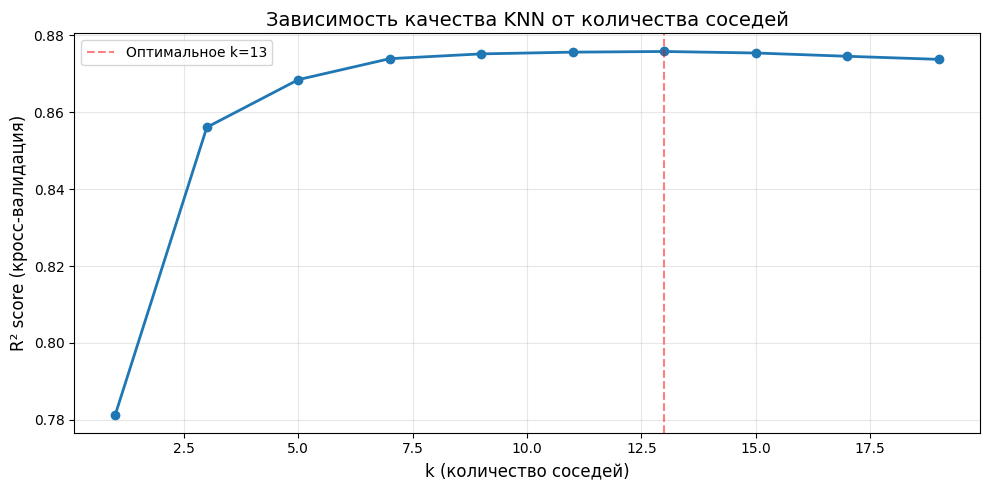

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, k_scores, marker='o', linewidth=2, markersize=6)
plt.axvline(x=optimal_k, color='r', linestyle='--', alpha=0.5, label=f'Оптимальное k={optimal_k}')
plt.xlabel('k (количество соседей)', fontsize=12)
plt.ylabel('R² score (кросс-валидация)', fontsize=12)
plt.title('Зависимость качества KNN от количества соседей', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Подбор весов
weights_options = ['uniform', 'distance']
weights_results = {}

for weight in weights_options:
    knn = KNeighborsRegressor(n_neighbors=optimal_k, weights=weight, p=2)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='r2')
    weights_results[weight] = scores.mean()
    print(f"Weights='{weight}': R² = {scores.mean():.4f}")

best_weight = max(weights_results, key=weights_results.get)
print(f"\nЛучший вариант весов: '{best_weight}' с R² = {weights_results[best_weight]:.4f}")

Weights='uniform': R² = 0.8758
Weights='distance': R² = 0.8774

Лучший вариант весов: 'distance' с R² = 0.8774


In [ ]:
#Подбор метрики расстояния
p_values = [1, 2]  # 1 - манхэттенское, 2 - евклидово
p_results = {}

for p in p_values:
    knn = KNeighborsRegressor(n_neighbors=optimal_k, weights=best_weight, p=p)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='r2')
    p_results[p] = scores.mean()
    metric_name = {1: 'Манхэттенское (p=1)', 2: 'Евклидово (p=2)'}[p]
    print(f"{metric_name}: R² = {scores.mean():.4f}")

best_p = max(p_results, key=p_results.get)
print(f"\nЛучшая метрика: p={best_p} с R² = {p_results[best_p]:.4f}")

Манхэттенское (p=1): R² = 0.8804
Евклидово (p=2): R² = 0.8774

Лучшая метрика: p=1 с R² = 0.8804


In [ ]:
#Отбор наиболее значимых признаков(15 штук)
correlations = X.corrwith(y).abs().sort_values(ascending=False)
print("Топ-15 признаков по абсолютной корреляции с целевой переменной:")
print(correlations.head(15))

top_n = 15
top_features = correlations.head(top_n).index
X_top = X[top_features]

Топ-15 признаков по абсолютной корреляции с целевой переменной:
ingredient_cost         0.905832
weight_g                0.797770
total_calories          0.725665
diameter_cm             0.672637
area_cm2                0.667906
price                   0.639036
cook_time_min           0.636945
size_S                  0.561016
complexity_score        0.465130
type_supreme            0.417428
type_classic            0.395962
ingredient_intensity    0.331892
density_g_per_cm2       0.300339
cheese_percent          0.292474
calories_per_100g       0.271639
dtype: float64


In [ ]:
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_test_top_scaled = scaler.transform(X_test_top)

In [ ]:
#Обучаем с лучшими параметрами
knn_top = KNeighborsRegressor(
    n_neighbors=optimal_k,
    weights=best_weight,
    p=best_p
)
knn_top.fit(X_train_top_scaled, y_train_top)
y_pred_top = knn_top.predict(X_test_top_scaled)

r2_top = r2_score(y_test_top, y_pred_top)
print(f"R² с топ-{top_n} признаками: {r2_top:.4f}")

R² с топ-15 признаками: 0.9026


In [ ]:
#Лучшие параметры по результатам проверки гипотез
print(f"Scaler: {best_scaler}")
print(f"k (соседи): {optimal_k}")
print(f"Веса: {best_weight}")
print(f"Метрика расстояния (p): {best_p}")
print(f"Отбор признаков: Топ-{top_n} признаков")


Scaler: StandardScaler
k (соседи): 13
Веса: distance
Метрика расстояния (p): 1
Отбор признаков: Топ-15 признаков


In [ ]:
#Формирование улучшенного бейзлайна
final_knn = KNeighborsRegressor(
    n_neighbors=optimal_k,
    weights=best_weight,
    p=best_p
)

scaler = StandardScaler()
X_train_final_scaled = scaler.fit_transform(X_train_top)
X_test_final_scaled = scaler.transform(X_test_top)

In [ ]:
#Обучаем финальную модель
final_knn.fit(X_train_final_scaled, y_train_top)
y_pred_final = final_knn.predict(X_test_final_scaled)

In [ ]:
#Метрики
improved_metrics = {
    'MAE': mean_absolute_error(y_test_top, y_pred_final),
    'MSE': mean_squared_error(y_test_top, y_pred_final),
    'RMSE': np.sqrt(mean_squared_error(y_test_top, y_pred_final)),
    'R2': r2_score(y_test_top, y_pred_final)
}
for metric, value in improved_metrics.items():
    print(f"  {metric}: {value:.4f}")

  MAE: 1.6119
  MSE: 4.1036
  RMSE: 2.0257
  R2: 0.9026


In [ ]:
#Сравнение с бейзлайном
comparison_df = pd.DataFrame({
    'Бейзлайн': baseline_metrics,
    'Улучшенная модель': improved_metrics
}).T
print(comparison_df)

                        MAE        MSE      RMSE        R2
Бейзлайн           2.787912  12.216017  3.495142  0.710125
Улучшенная модель  1.611876   4.103603  2.025735  0.902625


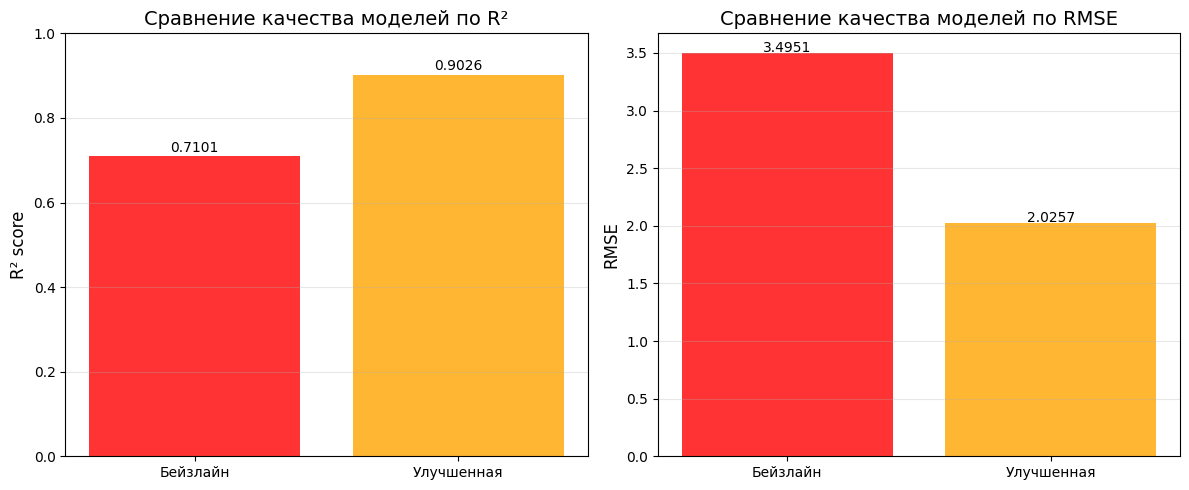

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
models = ['Бейзлайн',  'Улучшенная']
r2_values = [baseline_metrics['R2'],  improved_metrics['R2']]
colors = ['red', 'orange', 'green']

bars = plt.bar(models, r2_values, color=colors, alpha=0.8)
plt.ylabel('R² score', fontsize=12)
plt.title('Сравнение качества моделей по R²', fontsize=14)
plt.ylim(0, 1)
for bar, value in zip(bars, r2_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 2, 2)
rmse_values = [baseline_metrics['RMSE'],  improved_metrics['RMSE']]
bars = plt.bar(models, rmse_values, color=colors, alpha=0.8)
plt.ylabel('RMSE', fontsize=12)
plt.title('Сравнение качества моделей по RMSE', fontsize=14)
for bar, value in zip(bars, rmse_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

Использование масштабирования, отбор наиболее важных признаков и подбор гипер параметров сильно повлияли на обучение модели.
MAE уменьшился на 1.1, RMSE уменьшился практически в 3 раза,  а R² стал равен 0.9. Предсказания стали точнее.

### 4.	Имплементация алгоритма машинного обучения

In [ ]:
#Создание собственной модели
class MyKNNRegressor:
    def __init__(self, n_neighbors=5, weights='uniform', p=2):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.p = p
        self.X_train = None
        self.y_train = None

    #Обучение модели
    def fit(self, X, y):

        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self

    #Вычисление расстояния между точками
    def _compute_distances(self, X):
        n_samples = X.shape[0]
        n_train = self.X_train.shape[0]

        distances = np.zeros((n_samples, n_train))

        for i in range(n_samples):
            if self.p == 1:
                #Манхэттенскоее
                distances[i] = np.sum(np.abs(self.X_train - X[i]), axis=1)\

            elif self.p == 2:
                #Евклидово
                distances[i] = np.sqrt(np.sum((self.X_train - X[i]) ** 2, axis=1))
            else:
                #Общая метрика Минковского
                distances[i] = np.power(
                    np.sum(np.power(np.abs(self.X_train - X[i]), self.p), axis=1),
                    1 / self.p
                )

        return distances

    #Предсказание
    def predict(self, X):
        X = np.array(X)
        distances = self._compute_distances(X)
        predictions = np.zeros(X.shape[0])

        for i in range(X.shape[0]):
            #Получаем индексы k ближайших соседей
            neighbor_indices = np.argsort(distances[i])[:self.n_neighbors]
            neighbor_distances = distances[i, neighbor_indices]
            neighbor_values = self.y_train[neighbor_indices]

            #Вычисляем веса
            if self.weights == 'uniform':
                weights = np.ones(self.n_neighbors)
            elif self.weights == 'distance':
                #Избегаем деления на ноль
                weights = 1.0 / (neighbor_distances + 1e-10)
            else:
                raise ValueError(f"Неизвестный тип весов: {self.weights}")

            #Взвешенное среднее
            predictions[i] = np.average(neighbor_values, weights=weights)

        return predictions

In [ ]:
X_train_my = X_train_top_scaled
X_test_my = X_test_top_scaled
y_train_my = y_train_top.values
y_test_my = y_test_top.values

In [ ]:
#Создаем и обучаем модель с теми же параметрами, что и в бейзлайне
my_knn = MyKNNRegressor(
    n_neighbors=5,
    weights='uniform',
    p=2
)
my_knn.fit(X_train_my, y_train_my)
y_pred_my = my_knn.predict(X_test_my)

In [ ]:
#Метрики
my_knn_metrics = {
    'MAE': mean_absolute_error(y_test_my, y_pred_my),
    'MSE': mean_squared_error(y_test_my, y_pred_my),
    'RMSE': np.sqrt(mean_squared_error(y_test_my, y_pred_my)),
    'R2': r2_score(y_test_my, y_pred_my)
}

for metric, value in my_knn_metrics.items():
    print(f"  {metric}: {value:.4f}")

  MAE: 1.6939
  MSE: 4.5058
  RMSE: 2.1227
  R2: 0.8931


In [ ]:
#Добавление улучшений для модели
class  ImprovedMyKNNRegressor(MyKNNRegressor):

    def __init__(self, n_neighbors=5, weights='uniform', p=2,
                 scale_data=True, feature_indices=None):

        super().__init__(n_neighbors, weights, p)
        self.scale_data = scale_data
        self.feature_indices = feature_indices
        self.scaler = StandardScaler() if scale_data else None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        # Отбор признаков
        if self.feature_indices is not None:
            X = X[:, self.feature_indices]

        # Масштабирование
        if self.scale_data and self.scaler is not None:
            X = self.scaler.fit_transform(X)

        return super().fit(X, y)

    #Предсказание с улучшениями
    def predict(self, X):
        X = np.array(X)

        # Применяем те же преобразования, что и при обучении
        if self.feature_indices is not None:
            X = X[:, self.feature_indices]

        if self.scale_data and self.scaler is not None:
            X = self.scaler.transform(X)

        return super().predict(X)

In [ ]:
X_train_improved = X_train_top.values
X_test_improved = X_test_top.values
y_train_improved = y_train_top.values
y_test_improved = y_test_top.values

feature_indices = list(range(X_train_improved.shape[1]))

In [ ]:
#Обучение улучшенной версии
my_knn_improved =  ImprovedMyKNNRegressor(
    n_neighbors=optimal_k,
    weights=best_weight,
    p=best_p,
    scale_data=True,
    feature_indices=feature_indices
)

my_knn_improved.fit(X_train_improved, y_train_improved)
y_pred_improved_my = my_knn_improved.predict(X_test_improved)

In [ ]:
#Метрики улучшенной версии
improved_my_metrics = {
    'MAE': mean_absolute_error(y_test_improved, y_pred_improved_my),
    'MSE': mean_squared_error(y_test_improved, y_pred_improved_my),
    'RMSE': np.sqrt(mean_squared_error(y_test_improved, y_pred_improved_my)),
    'R2': r2_score(y_test_improved, y_pred_improved_my)
}

for metric, value in improved_my_metrics.items():
    print(f"  {metric}: {value:.4f}")

  MAE: 1.6119
  MSE: 4.1036
  RMSE: 2.0257
  R2: 0.9026


In [ ]:
#Сравнение с улучшенным бейзлайном

final_comparison_df = pd.DataFrame({
    'ImprovedKNN': improved_metrics,
    'ImprMyKNNRegressor': improved_my_metrics
}).T

print("Сравнение метрик улучшенных версий:")
print(final_comparison_df)

Сравнение метрик улучшенных версий:
                         MAE       MSE      RMSE        R2
ImprovedKNN         1.611876  4.103603  2.025735  0.902625
ImprMyKNNRegressor  1.611876  4.103603  2.025735  0.902625


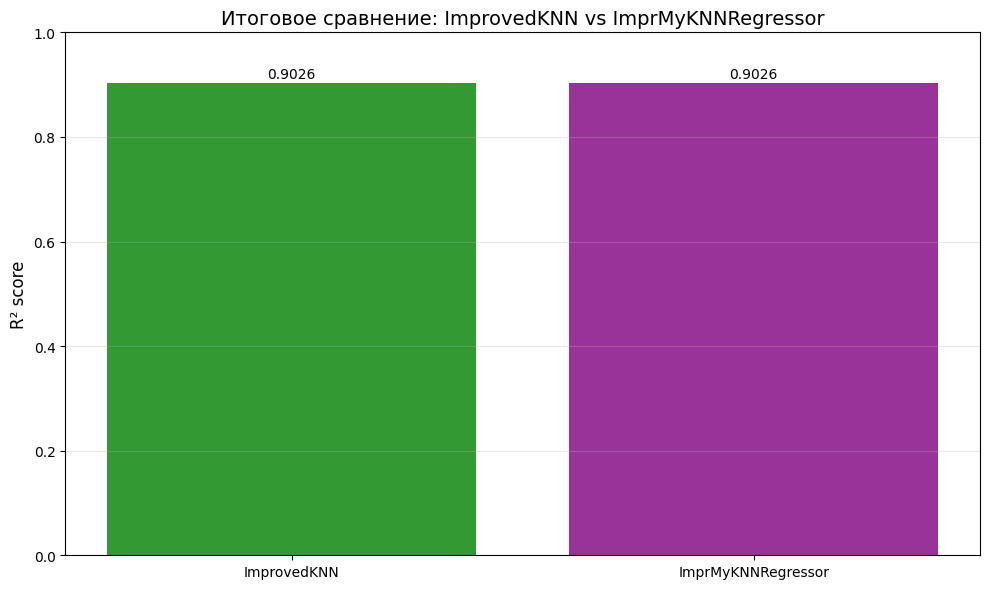

In [ ]:
#Визуализация итогового сравнения
plt.figure(figsize=(10, 6))
models_final = ['ImprovedKNN', 'ImprMyKNNRegressor']
r2_final = [improved_metrics['R2'], improved_my_metrics['R2']]
colors_final = ['green', 'purple']

bars = plt.bar(models_final, r2_final, color=colors_final, alpha=0.8)
plt.ylabel('R² score', fontsize=12)
plt.title('Итоговое сравнение: ImprovedKNN vs ImprMyKNNRegressor', fontsize=14)
plt.ylim(0, 1)
for bar, value in zip(bars, r2_final):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
final_comparison = pd.DataFrame({
    'Baseline KNN': baseline_metrics,
    'Improved KNN': improved_metrics,
    'My KNNRegressor': my_knn_metrics,
    'ImprovedMy KNNRegressor': improved_my_metrics
}).T

print("Сравнение метрик всех версий:")
print(final_comparison)

Сравнение метрик всех версий:
                              MAE        MSE      RMSE        R2
Baseline KNN             2.787912  12.216017  3.495142  0.710125
Improved KNN             1.611876   4.103603  2.025735  0.902625
My KNNRegressor          1.693863   4.505844  2.122697  0.893080
ImprovedMy KNNRegressor  1.611876   4.103603  2.025735  0.902625


Результаты показали, что оптимизация гиперпараметров и препроцессинг данных позволили существенно улучшить качество модели: R² вырос с 0.71 до 0.90, MSE снизился с 12.22 до 4.10, а MAE уменьшился с 2.79 до 1.61. Собственная реализация алгоритма продемонстрировала сравнимую эффективность с библиотечной версией, подтвердив корректность имплементации и понимание принципов работы KNN.